In [ ]:
import pandas as pd
import numpy as np

jp_morgan = pd.read_csv('JPMorgan_Chase.csv')
jp_morgan

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434315,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500584,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200


In [ ]:
jp_morgan['Date'] = pd.to_datetime(jp_morgan['Date'])
jp_morgan

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000
1,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700
2,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700
3,2013-01-07,45.090000,45.490002,45.020000,45.410000,33.434315,24456900
4,2013-01-08,45.400002,45.500000,44.959999,45.500000,33.500584,19624200
...,...,...,...,...,...,...,...
2513,2022-12-23,130.580002,131.440002,129.639999,131.279999,126.698761,5091900
2514,2022-12-27,131.570007,132.220001,130.550003,131.740005,127.142708,5411000
2515,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700
2516,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200


In [ ]:
complete_date_range = pd.date_range(start = '2013-01-01', end = '2023-01-01')
df_dates = pd.DataFrame(complete_date_range, columns=['Date'])
df = pd.merge(df_dates, jp_morgan, on='Date', how='left')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,31413000.0
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,24227700.0
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,24487700.0
4,2013-01-05,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8827700.0
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6585200.0
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9292500.0
3651,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

for column in columns:
    df[column].interpolate(method='linear', inplace=True)
df.fillna(method='bfill', inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-01,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
1,2013-01-02,44.980000,45.000000,44.220001,44.660000,32.882111,3.141300e+07
2,2013-01-03,44.740002,44.750000,44.200001,44.570000,32.815834,2.422770e+07
3,2013-01-04,44.450001,45.430000,44.439999,45.360001,33.397507,2.448770e+07
4,2013-01-05,44.663334,45.450001,44.633333,45.376667,33.409776,2.447743e+07
...,...,...,...,...,...,...,...
3648,2022-12-28,131.850006,133.410004,131.009995,132.460007,127.837578,8.827700e+06
3649,2022-12-29,132.929993,133.270004,132.309998,133.220001,128.571075,6.585200e+06
3650,2022-12-30,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06
3651,2022-12-31,132.809998,134.330002,132.440002,134.100006,129.420364,9.292500e+06


In [ ]:
features = df[['Open', 'High', 'Low','Adj Close', 'Volume']]
target = df['Close']

In [ ]:
features

,Open,High,Low,Adj Close,Volume
0,44.980000,45.000000,44.220001,32.882111,3.141300e+07
1,44.980000,45.000000,44.220001,32.882111,3.141300e+07
2,44.740002,44.750000,44.200001,32.815834,2.422770e+07
3,44.450001,45.430000,44.439999,33.397507,2.448770e+07
4,44.663334,45.450001,44.633333,33.409776,2.447743e+07
...,...,...,...,...,...
3648,131.850006,133.410004,131.009995,127.837578,8.827700e+06
3649,132.929993,133.270004,132.309998,128.571075,6.585200e+06
3650,132.809998,134.330002,132.440002,129.420364,9.292500e+06
3651,132.809998,134.330002,132.440002,129.420364,9.292500e+06


In [ ]:
target

0        44.660000
1        44.660000
2        44.570000
3        45.360001
4        45.376667
           ...    
3648    132.460007
3649    133.220001
3650    134.100006
3651    134.100006
3652    134.100006
Name: Close, Length: 3653, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(features)
scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(target.values.reshape(-1,1))

In [ ]:
features_scaled.shape, target_scaled.shape

((3653, 5), (3653, 1))

In [ ]:
def create_sequences(input_data, target_data, sequence_length):
    xs = []
    ys = []
    for i in range(len(input_data)-sequence_length):
        xs.append(input_data[i:i+sequence_length])
        ys.append(target_data[i+sequence_length])
    return np.array(xs), np.array(ys)

In [ ]:
sequence_length = 7
X, y = create_sequences(features_scaled, target_scaled, sequence_length)

In [ ]:
X.shape, y.shape

((3646, 7, 5), (3646, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 50)             11200     
                                                                 
 dropout (Dropout)           (None, 7, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2, validation_split=0.2)

Epoch 1/100
73/73 - 6s - loss: 0.0142 - val_loss: 5.9126e-04 - 6s/epoch - 83ms/step
Epoch 2/100
73/73 - 1s - loss: 0.0033 - val_loss: 5.9889e-04 - 815ms/epoch - 11ms/step
Epoch 3/100
73/73 - 1s - loss: 0.0028 - val_loss: 7.2334e-04 - 724ms/epoch - 10ms/step
Epoch 4/100
73/73 - 1s - loss: 0.0022 - val_loss: 3.8175e-04 - 733ms/epoch - 10ms/step
Epoch 5/100
73/73 - 1s - loss: 0.0023 - val_loss: 9.2810e-04 - 840ms/epoch - 12ms/step
Epoch 6/100
73/73 - 1s - loss: 0.0019 - val_loss: 3.8499e-04 - 1s/epoch - 16ms/step
Epoch 7/100
73/73 - 1s - loss: 0.0020 - val_loss: 5.5982e-04 - 1s/epoch - 14ms/step
Epoch 8/100
73/73 - 1s - loss: 0.0018 - val_loss: 3.5651e-04 - 754ms/epoch - 10ms/step
Epoch 9/100
73/73 - 1s - loss: 0.0019 - val_loss: 3.5725e-04 - 739ms/epoch - 10ms/step
Epoch 10/100
73/73 - 1s - loss: 0.0018 - val_loss: 3.7698e-04 - 715ms/epoch - 10ms/step
Epoch 11/100
73/73 - 1s - loss: 0.0018 - val_loss: 3.5555e-04 - 756ms/epoch - 10ms/step
Epoch 12/100
73/73 - 1s - loss: 0.0016 - val_loss:

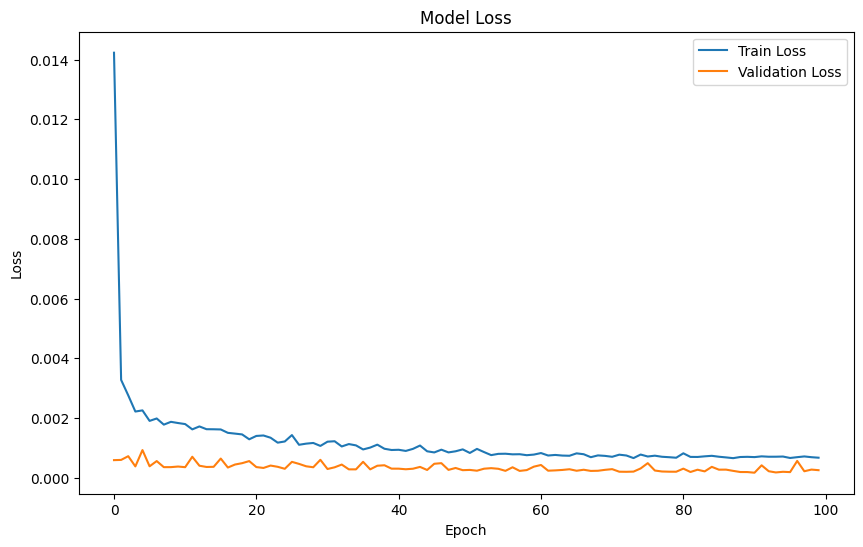

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

114/114 [==============================] - 3s 6ms/step


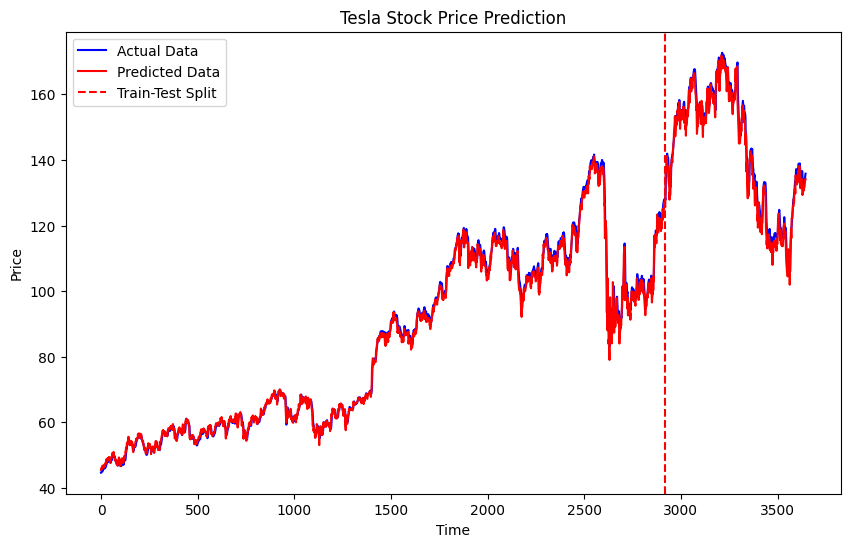

In [ ]:
y_pred_whole = model.predict(X)

y_pred_whole_inv = scaler_target.inverse_transform(y_pred_whole)
y_actual_whole_inv = scaler_target.inverse_transform(y)

plt.figure(figsize=(10,6))
plt.plot(y_pred_whole_inv, label='Actual Data', color='blue')
plt.plot(y_actual_whole_inv, label='Predicted Data', color='red')
plt.axvline(x=len(X_train), color='r', linestyle='--', label='Train-Test Split')
plt.title('Tesla Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

y_train_pred = model.predict(X_train)
y_train_pred_inv = scaler_target.inverse_transform(y_train_pred)
y_train_inv = scaler_target.inverse_transform(y_train)

y_test_pred = model.predict(X_test)
y_test_pred_inv = scaler_target.inverse_transform(y_test_pred)
y_test_inv = scaler_target.inverse_transform(y_test)


train_mae = mean_absolute_error(y_train_inv, y_train_pred_inv)
train_rmse = math.sqrt(mean_squared_error(y_train_inv, y_train_pred_inv))

test_mae = mean_absolute_error(y_test_inv, y_test_pred_inv)
test_rmse = math.sqrt(mean_squared_error(y_test_inv, y_test_pred_inv))

print(f'Training MAE: {train_mae}')
print(f'Training RMSE: {train_rmse}')
print(f'Testing MAE: {test_mae}')
print(f'Testing RMSE: {test_rmse}')

23/23 [==============================] - 0s 8ms/step
Training MAE: 1.4447048849021786
Training RMSE: 2.0384499276921075
Testing MAE: 1.4711937821695957
Testing RMSE: 2.0917379640446256
